In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture as mix

In [2]:
data = pd.read_excel('N225.xlsx', sheet_name='N225').dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-04-08,26767.289063,26926.410156,26700.919922,26748.890625,26748.890625,0.0
1,1988-04-11,26761.220703,26998.359375,26761.220703,26924.869141,26924.869141,0.0
2,1988-04-12,26939.130859,26985.740234,26845.019531,26930.839844,26930.839844,0.0
3,1988-04-13,26942.300781,26995.279297,26922.560547,26985.550781,26985.550781,0.0
4,1988-04-14,26969.369141,27123.189453,26969.369141,27111.349609,27111.349609,0.0
5,1988-04-15,27103.929688,27103.929688,26774.130859,26893.570313,26893.570313,0.0
6,1988-04-18,26883.839844,26984.109375,26671.449219,26671.449219,26671.449219,0.0
7,1988-04-19,26653.250000,26676.839844,26444.810547,26657.000000,26657.000000,0.0
8,1988-04-20,26662.779297,26894.240234,26662.779297,26864.089844,26864.089844,0.0
9,1988-04-21,26870.740234,26870.740234,26790.789063,26828.160156,26828.160156,0.0


In [3]:
dates = data['Date'].values
opens = data['Open'].values
closes = data['Close'].values
highs = data['High'].values
lows = data['Low'].values
adjcloses = data['Adj Close'].values

# The factors:
opclsp = ((data['Open']-data['Close'])/data['Open']).values*100# % change in price during the day
highlowsp = ((data['High']-data['Low'])/data['Close']).values*100 # Spread of high low
prc_ret = data['Close'].pct_change().fillna(0)*100 # Daily price change
data['Return Daily'] = prc_ret
Vol_change = data['Volume'].pct_change().fillna(0)*100
Vol_change[Vol_change==np.inf] = 0
log_ret = np.log((prc_ret+100)/100)

In [4]:
def get_rolling_vol(vol_wind,lst):
    vol_lst = []
    for i in range(len(lst)):
        if i<vol_wind:
            vol_lst.append(0)
        else:
            vol_lst.append(np.std(lst[i-vol_wind:i]))
    return np.array(vol_lst)
#vol30 = get_rolling_vol(30, data['Close'])
#vol100 = get_rolling_vol(100, prc_ret)
#vol250 = get_rolling_vol(250, data['Close'])
#vol500 = get_rolling_vol(500, data['Close'])
#vol1000 = get_rolling_vol(1000, data['Close'])

In [5]:
#def to_float(nparray):
#    for i in range(len(nparray)):
#        nparray[i] = round(nparray[i],4)
#    return nparray

def slicer(array, train_p):
    a_shape = array.shape
    head = array[0:train_p[0]]
    tail = array[train_p[1]:]
    ret = np.append(head,tail)
    return ret.reshape(int(len(ret)/a_shape[1]),a_shape[1])

to_float = lambda x : [round(x[i],4) for i in range(len(x))]
    
def structuring_data(train_p,
                     window,
                     vollst):
    hl = highlowsp[window:]
    oc = opclsp[window:]
    pr = prc_ret[window:]
    date = dates[window:]
    vc = Vol_change[window:]
    lr = log_ret[window:]
    vol = vollst[window:]
    log_diff = np.append([0],np.diff(lr))
    x = np.column_stack([lr])
    lengthx = len(x)
    #x_train, x_test, dates_train, dates_test = model_selection.train_test_split(x, dates[window:], test_size = 0.2, random_state = 2019)
    x_train, x_test, dates_train, dates_test = x[train_p[0]:train_p[1]], slicer(x,train_p), date[train_p[0]:train_p[1]],np.append(date[0:train_p[0]], date[train_p[1]:])
    #return x_train
    model = mix.GaussianMixture(n_components=2,covariance_type="full")
    model.fit(x_train)
    train_hiddens = model.predict(x_train)
    print('Training Period Variances:')
    print(np.diag(model.covariances_[0]))
    print(np.diag(model.covariances_[1]))
    hiddens = model.predict(x_test)
    print('Score:',model.score(x_test))
    print('States 1: %d. States 2: %d.'%(len(hiddens[hiddens==0]),len(hiddens[hiddens==1])))
    np.set_printoptions(suppress=True)
    print('The means of state 0:')
    print(model.means_[0])

    print('The means of state 1:')
    print(model.means_[1])

    print(len(x_test),len(dates_test))
    closes_train = closes[train_p[0]:train_p[1]]
    closes_test = np.append(closes[0:train_p[0]], closes[train_p[1]:])
    lr_train = np.array(lr[train_p[0]:train_p[1]])
    lr_test = np.append(lr[0:train_p[0]], lr[train_p[1]:])
    
    #closes00, dates00 = x_train[train_hiddens==0], dates_train[train_hiddens==0]
    #closes01, dates01 = x_train[train_hiddens==1], dates_train[train_hiddens==1]
    
    #closes10, dates10 = x_test[hiddens==0], dates_test[hiddens==0]
    #closes11, dates11 = x_test[hiddens==1], dates_test[hiddens==1]
    
        
    print(len(train_hiddens),len(closes_train),len(dates_train),len(lr_train),len(hiddens),len(closes_test),len(dates_test),len(lr_test))
    return [train_hiddens, dates_train, closes_train, lr_train, 
            hiddens, dates_test, closes_test, lr_test, 
            [np.diag(model.covariances_[0]),np.diag(model.covariances_[1])]]

In [6]:
slices = [int(len(data)*0.2),int(len(data)*0.4),int(len(data)*0.6),int(len(data)*0.8),len(data)-1]
slices

[1532, 3064, 4597, 6129, 7661]

Training Period Variances:
[0.00047106]
[8.54122168e-05]
Score: 2.9539100338922024
States 1: 239. States 2: 1323.
The means of state 0:
[-0.00124836]
The means of state 1:
[0.00046931]
1562 1562
6100 6100 6100 6100 1562 1562 1562 1562
For testing period:
Dates in state 1: 239 Dates in state 2: 1323


C:\Users\Lance\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


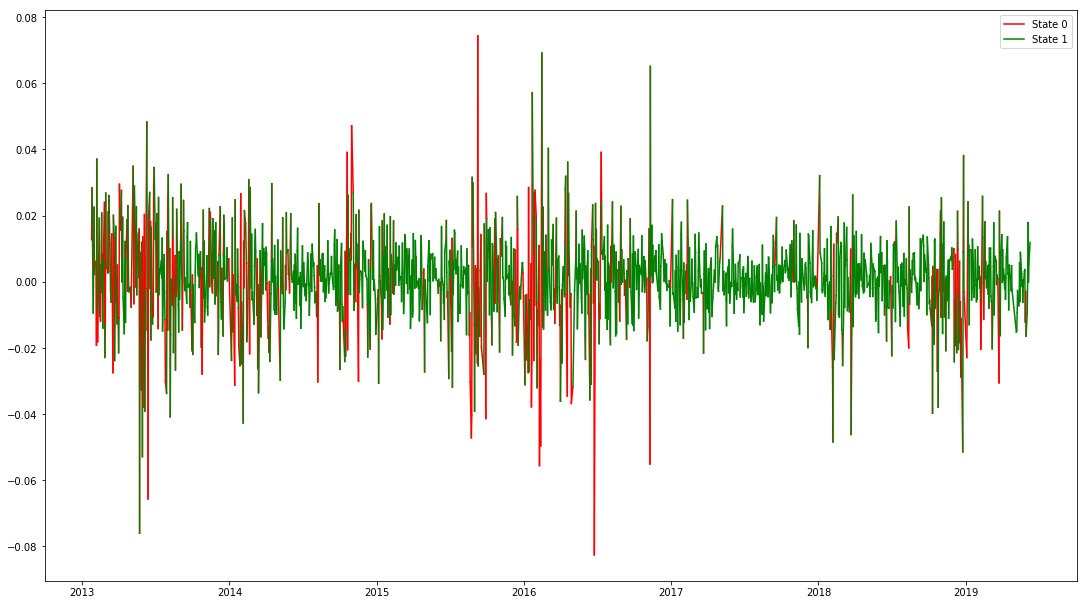

In [7]:
wind = 0
ret = structuring_data((0,6100), wind, get_rolling_vol(10, prc_ret))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

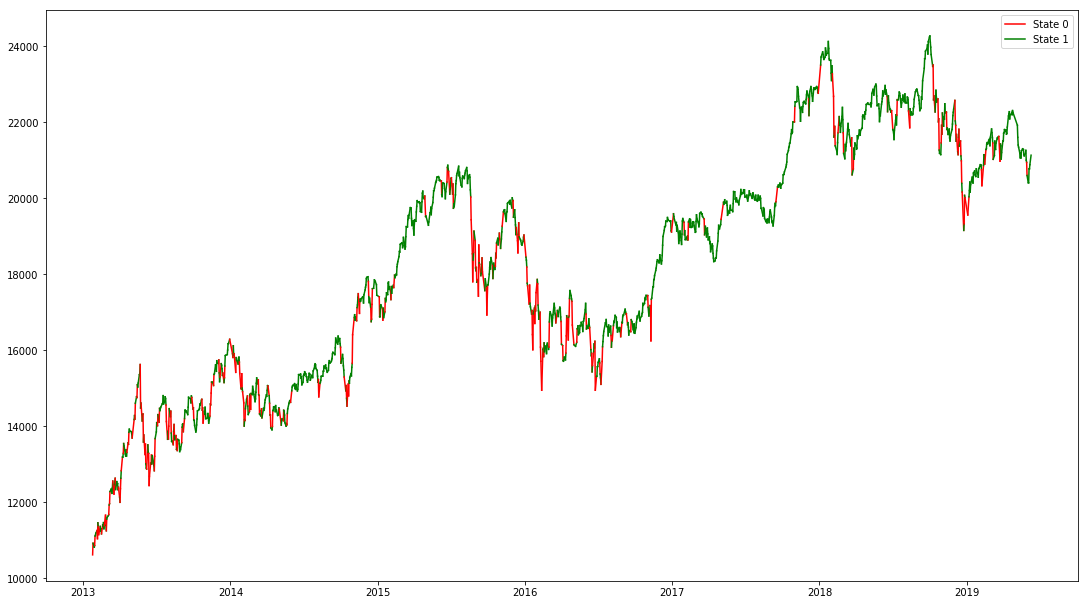

In [8]:
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

For training period:
Dates in state 1: 1162 Dates in state 2: 4938


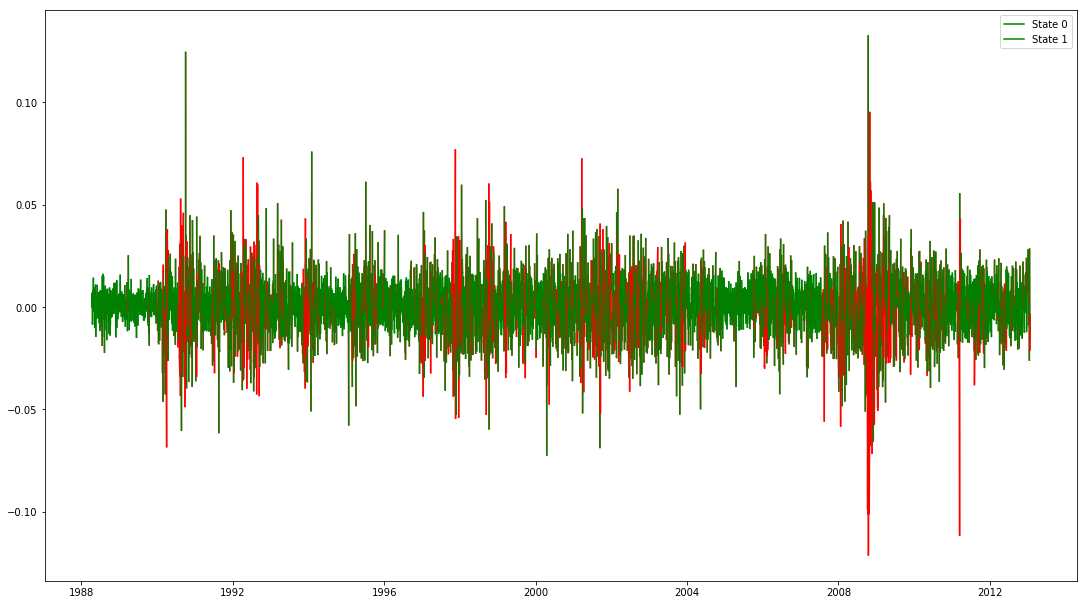

In [9]:
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

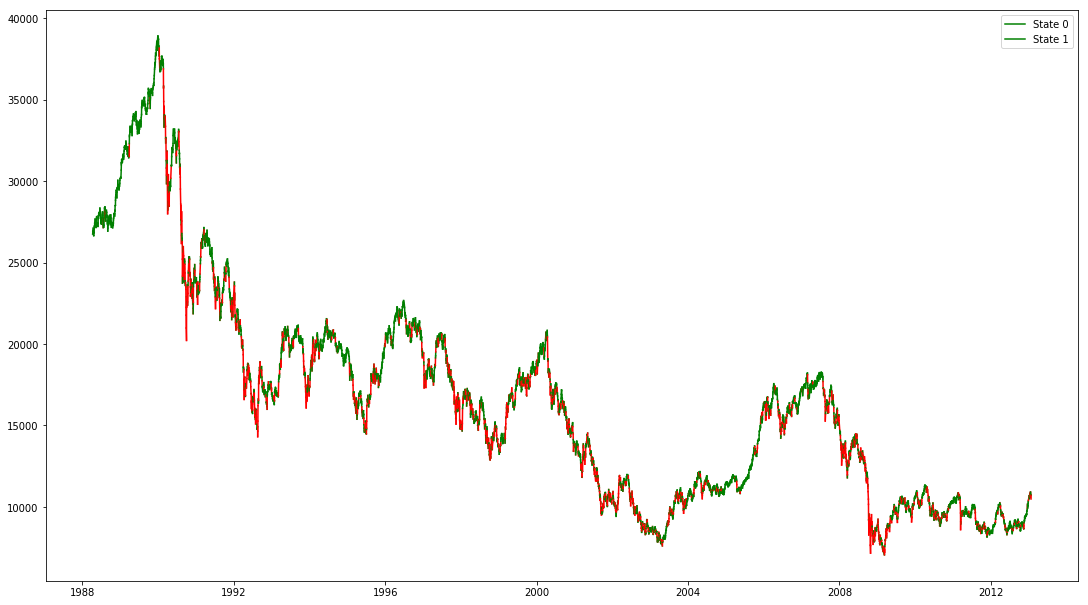

In [10]:
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

# Cross Validation

In [11]:
slices

[1532, 3064, 4597, 6129, 7661]

Training Period: 1994-06-27T00:00:00.000000000 to 2019-06-10T00:00:00.000000000
Training Period Variances:
[0.00046018]
[0.00008762]
Score: 2.9061388245231314
States 1: 253. States 2: 1280.
The means of state 0:
[-0.00168221]
The means of state 1:
[0.0009061]
1533 1533
6129 6129 6129 6129 1533 1533 1533 1533
For testing period:
Dates in state 1: 253 Dates in state 2: 1280


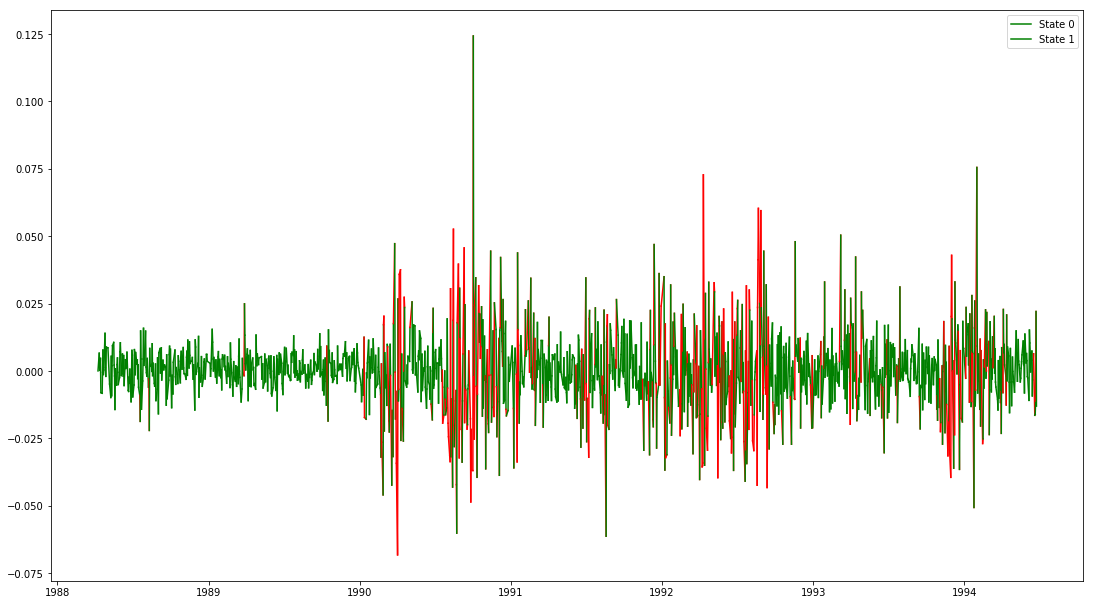

In [21]:
print('Training Period: %s to %s'%(dates[slices[0]],dates[slices[4]]))

wind = 0
ret = structuring_data((slices[0],slices[4]), wind, get_rolling_vol(10, prc_ret))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])-1):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

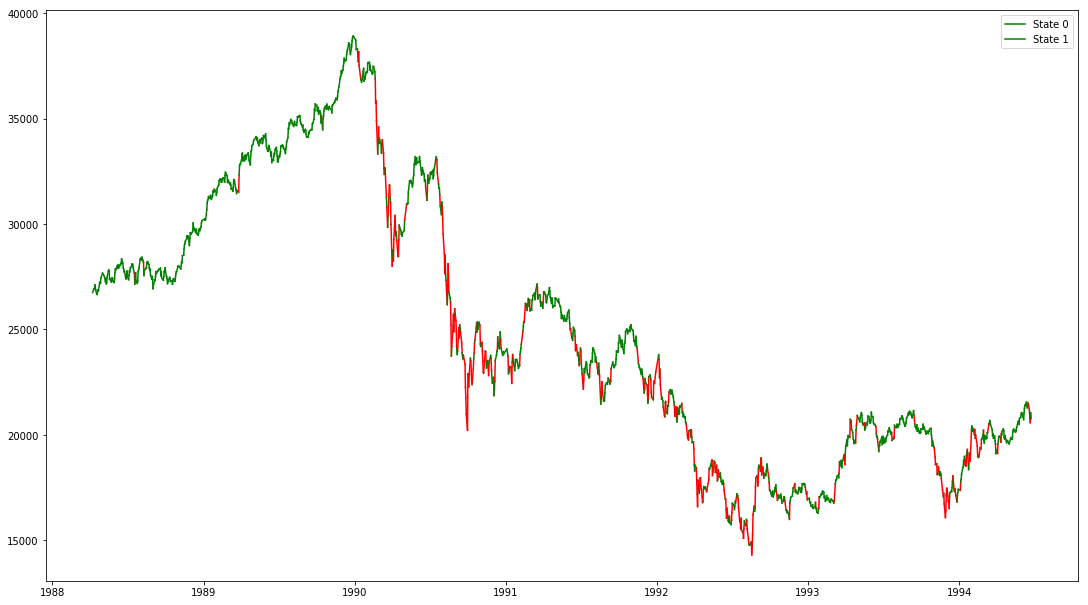

In [22]:
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])-1):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

For training period:
Dates in state 1: 5191 Dates in state 2: 938


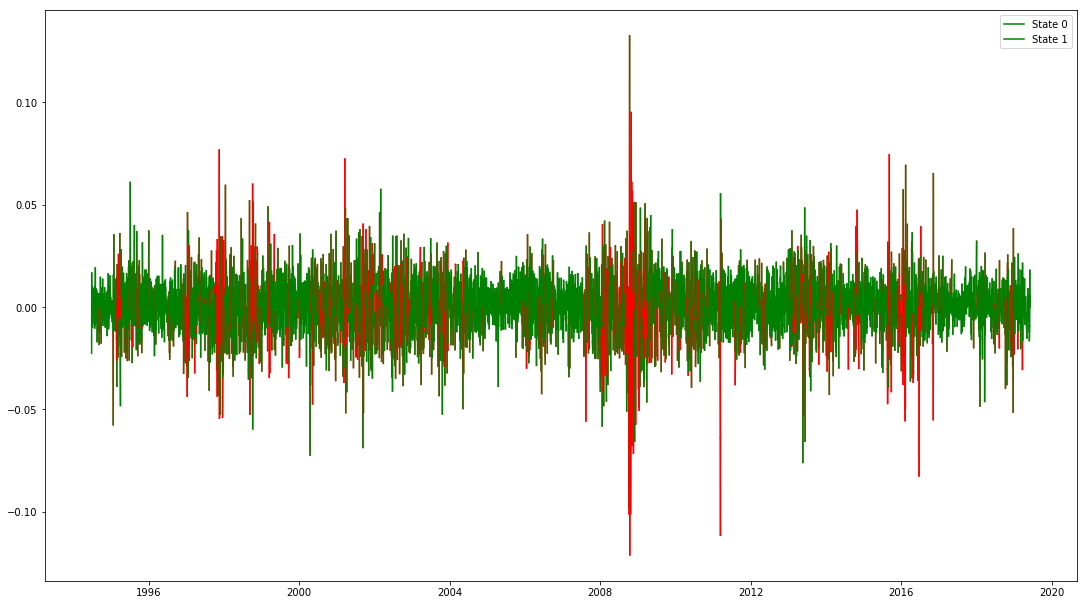

In [14]:
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

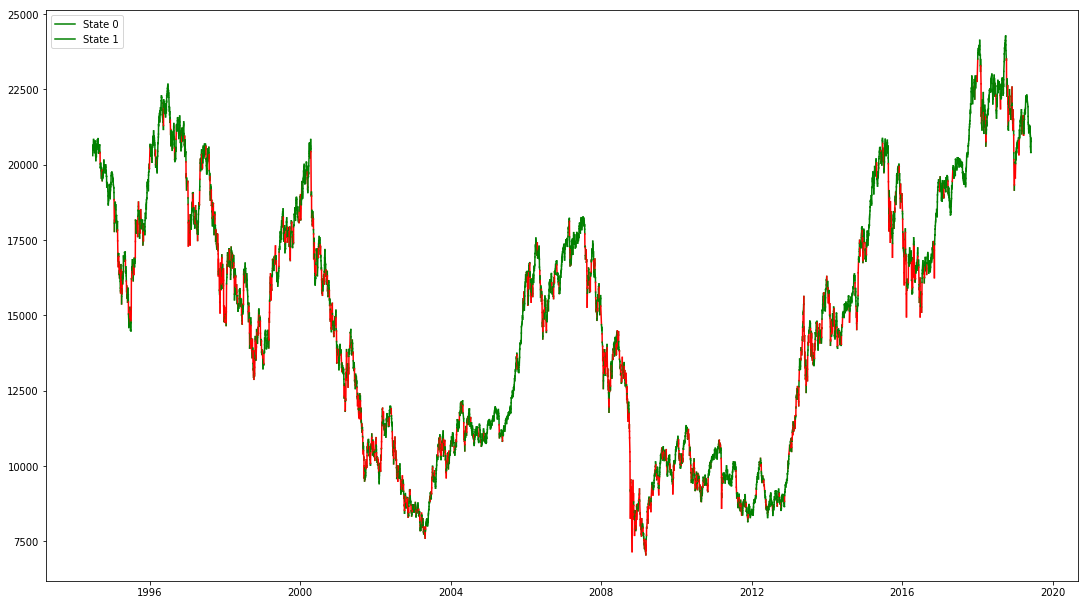

In [15]:
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

Training Period: 1992-04-30T00:00:00.000000000 to 2015-05-13T00:00:00.000000000
Training Period Variances:
[0.00046887]
[0.00009731]
Score: 2.9745118617525677
States 1: 247. States 2: 1753.
The means of state 0:
[-0.00123919]
The means of state 1:
[0.00070903]
2000 2000
5662 5662 5662 5662 2000 2000 2000 2000
For testing period:
Dates in state 1: 247 Dates in state 2: 1753


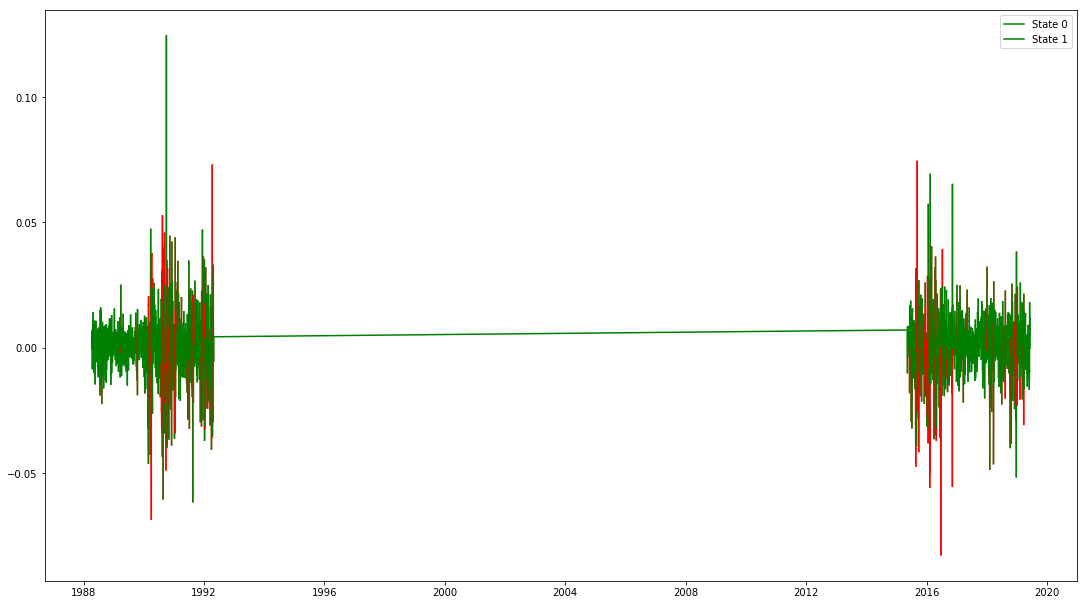

In [16]:
print('Training Period: %s to %s'%(dates[1000],dates[6662]))

wind = 0
ret = structuring_data((1000,6662), wind, get_rolling_vol(10, prc_ret))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

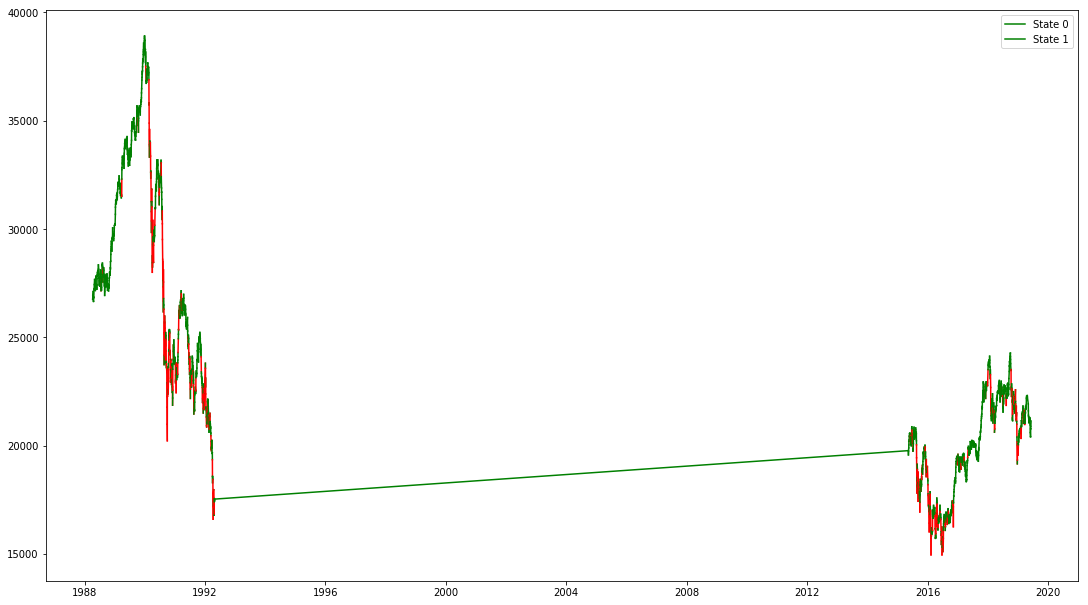

In [17]:
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

For training period:
Dates in state 1: 965 Dates in state 2: 4697


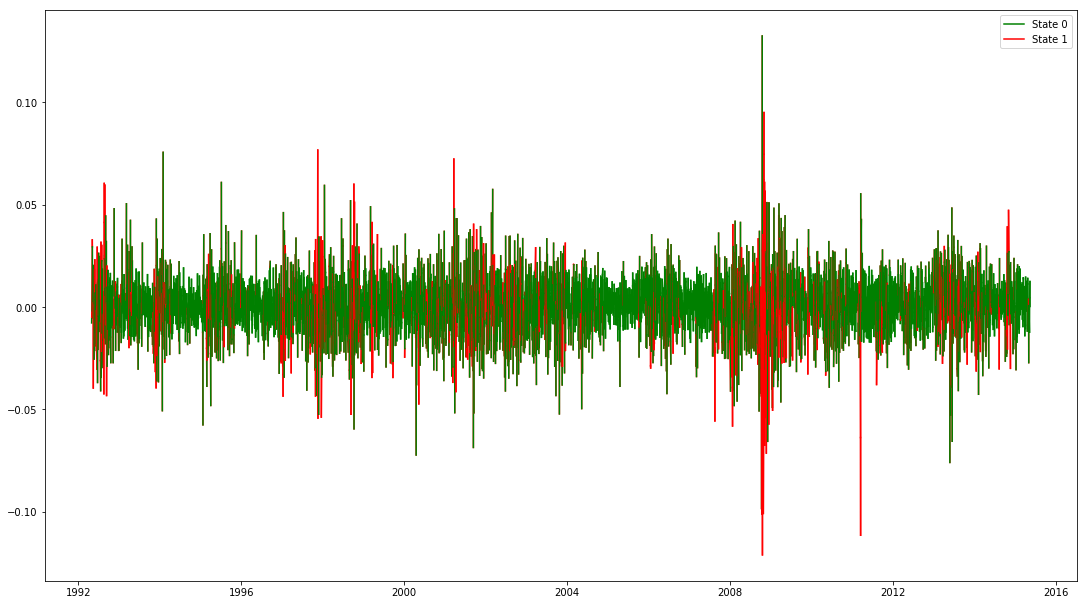

In [18]:
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

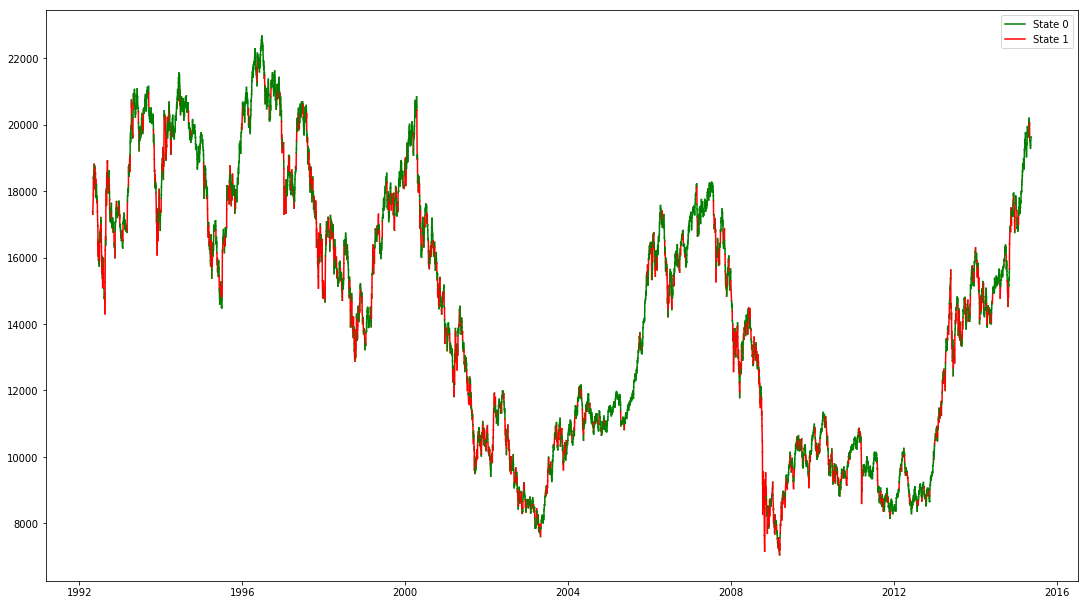

In [19]:
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

In [24]:
# This slicer is for the cross validation on split training period
def slicer2(array, test_p):
    a_shape = array.shape
    head = array[0:test_p[0]]
    tail = array[test_p[1]:]
    ret = np.append(head,tail)
    return ret.reshape(int(len(ret)/a_shape[1]),a_shape[1])

to_float = lambda x : [round(x[i],4) for i in range(len(x))]
    
def structuring_data2(test_p,
                      window,
                      vollst):
    hl = highlowsp[window:]
    oc = opclsp[window:]
    pr = prc_ret[window:]
    date = dates[window:]
    vc = Vol_change[window:]
    lr = log_ret[window:]
    vol = vollst[window:]
    log_diff = np.append([0],np.diff(lr))
    x = np.column_stack([lr])
    lengthx = len(x)
    #x_train, x_test, dates_train, dates_test = model_selection.train_test_split(x, dates[window:], test_size = 0.2, random_state = 2019)
    x_train, x_test, dates_train, dates_test = slicer(x,test_p), x[test_p[0]:test_p[1]], np.append(date[0:test_p[0]], date[test_p[1]:]), date[test_p[0]:test_p[1]]
    #return x_train
    model = mix.GaussianMixture(n_components=2,covariance_type="full")
    model.fit(x_train)
    train_hiddens = model.predict(x_train)
    print('Training Period Variances:')
    print(np.diag(model.covariances_[0]))
    print(np.diag(model.covariances_[1]))
    hiddens = model.predict(x_test)
    print('Score:',model.score(x_test))
    print('States 1: %d. States 2: %d.'%(len(hiddens[hiddens==0]),len(hiddens[hiddens==1])))
    np.set_printoptions(suppress=True)
    print('The means of state 0:')
    print(model.means_[0])

    print('The means of state 1:')
    print(model.means_[1])

    print(len(x_test),len(dates_test))
    closes_train = closes[test_p[0]:test_p[1]]
    closes_test = np.append(closes[0:test_p[0]], closes[test_p[1]:])
    lr_train = np.array(lr[test_p[0]:test_p[1]])
    lr_test = np.append(lr[0:test_p[0]], lr[test_p[1]:])
    
    #closes00, dates00 = x_train[train_hiddens==0], dates_train[train_hiddens==0]
    #closes01, dates01 = x_train[train_hiddens==1], dates_train[train_hiddens==1]
    
    #closes10, dates10 = x_test[hiddens==0], dates_test[hiddens==0]
    #closes11, dates11 = x_test[hiddens==1], dates_test[hiddens==1]
    
        
    print(len(train_hiddens),len(closes_train),len(dates_train),len(lr_train),len(hiddens),len(closes_test),len(dates_test),len(lr_test))
    return [train_hiddens, dates_train, closes_train, lr_train, 
            hiddens, dates_test, closes_test, lr_test, 
            [np.diag(model.covariances_[0]),np.diag(model.covariances_[1])]]

Training Period: 1994-06-27T00:00:00.000000000 to 2019-06-10T00:00:00.000000000
Training Period Variances:
[0.00043185]
[0.00004966]
Score: 2.842480441831188
States 1: 1882. States 2: 4247.
The means of state 0:
[-0.00076547]
The means of state 1:
[0.00026906]
6129 6129
1533 6129 1533 6129 6129 1533 6129 1533
For testing period:
Dates in state 1: 1882 Dates in state 2: 4247


IndexError: index 1533 is out of bounds for axis 0 with size 1533

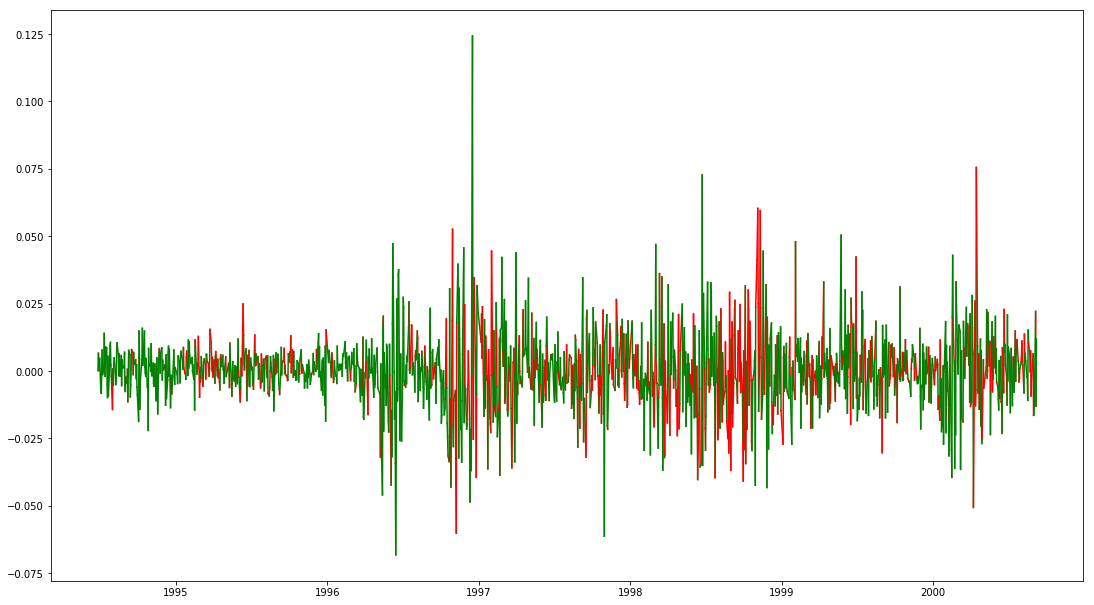

In [27]:
# From this example on we put in the 
print('Testing Period: %s to %s'%(dates[slices[0]],dates[slices[4]]))

wind = 0
ret = structuring_data2((slices[0],slices[4]), wind, get_rolling_vol(10, prc_ret))
print('For testing period:')
print('Dates in state 1:',len(ret[4][ret[4]==0]), 'Dates in state 2:',len(ret[4][ret[4]==1]))

fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)

#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])-1):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[7][i1-1],ret[7][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

In [ ]:
# Testing Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[4])-1):#len(closes)-1):
    if ret[4][i1]==highvol_mark:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='r')
    else:
        plt.plot([ret[5][i1-1],ret[5][i1]],[ret[6][i1-1],ret[6][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

In [ ]:
print('For training period:')
print('Dates in state 1:',len(ret[0][ret[0]==0]), 'Dates in state 2:',len(ret[0][ret[0]==1]))
# Training Period Log-return
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
#for i1 in range(1,len(ret[5])):#len(closes)-1):
#    plt.plot([dates[wind:][i1-1],dates[wind:][i1]],[closes[wind:][i1-1],closes[wind:][i1]],color='b')
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[3][i1-1],ret[3][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()

In [ ]:
# Training Period close
fig2 = plt.figure()
fig2.set_size_inches(18.5, 10.5)
if ret[-1][1] > ret[-1][0]:
    highvol_mark = 1
else:
    highvol_mark = 0
for i1 in range(1,len(ret[0])):#len(closes)-1):
    if ret[0][i1]==highvol_mark:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='r')
    else:
        plt.plot([ret[1][i1-1],ret[1][i1]],[ret[2][i1-1],ret[2][i1]],color='g')
plt.legend(['State 0','State 1'])
plt.show()